## Insurance 

In [1]:
# All the imports resides here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as ols


In [2]:
# fetch the csv data from the file

data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Description :
    1. From the above data we can see there are 6 independent varaibles 
    2. The possible problem statement can be to figure out the charges based on the user details

#### Things we are going to do

    1. Check the categorical and numerical values
    2. Will identify the centeral tendency for the values
    3. Check for the NULL values and handle them
    4. Check for outliers and see whether they will impact the data
    5. We will try to visualize the data using pairplot or scatter plot
    6. We will identify the correlation between the varialbles using heatmap
    7. convert the categorical values into numerical using get_dummies [handle ]
    8. Perfom OLS [Oridinal Linear Regression] and check the p-values and coefficients of all params
    9. apply Linear Regression / OLS / Ridge / Lasso models and check MSE / RMSE / R2_score
    10. Convert the model into pickle file

### 1. Check the categorical and numerical values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


###### Analysis :
    1. From the info, we can see that we have 3 categorical values [sex,smoker,region], Even though children param is categorical value, It is in the integer format
    2. Age, BMI and charges are discreate values
    3. We can also see that, there are no null values in any column

### 2. Will identify the centeral tendency for the values

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###### Analysis :
    1. When we compare the mean and 50% values of all the params, we can see age, bmi and children are fine
    2. Charges mean and 50% value have good amount of difference, There can be a possibility of outliers, Lets see while visualizing the data

In [6]:
data.describe(include = 'O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


###### Analysis :
    1. Here we can see some of the central tendency values for objects

### 3. Check for the NULL values and handle them

In [7]:
data.isnull().sum().sort_values(ascending = False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###### Analysis : 
    1. There are no null values in the data

In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 5. We will try to visualize the data using pairplot or scatter plot

###### Lets try to plot all the numerical values using regplot from seaborn

<AxesSubplot:xlabel='bmi', ylabel='charges'>

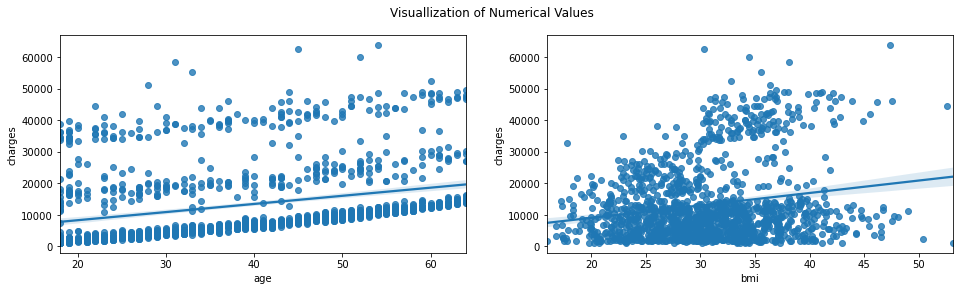

In [9]:
fig, axes = plt.subplots(1, 2, figsize = (16,4))
fig.suptitle("Visuallization of Numerical Values")

sns.regplot(x = "age", y = "charges", data = data, ax = axes[0])
sns.regplot(x = "bmi", y = "charges", data = data, ax = axes[1])

###### Analysis : 
    1. We can clearly see the upward tick for the charges with the increase in the age and bmi

#### Lets plot categorical values

<AxesSubplot:xlabel='region', ylabel='charges'>

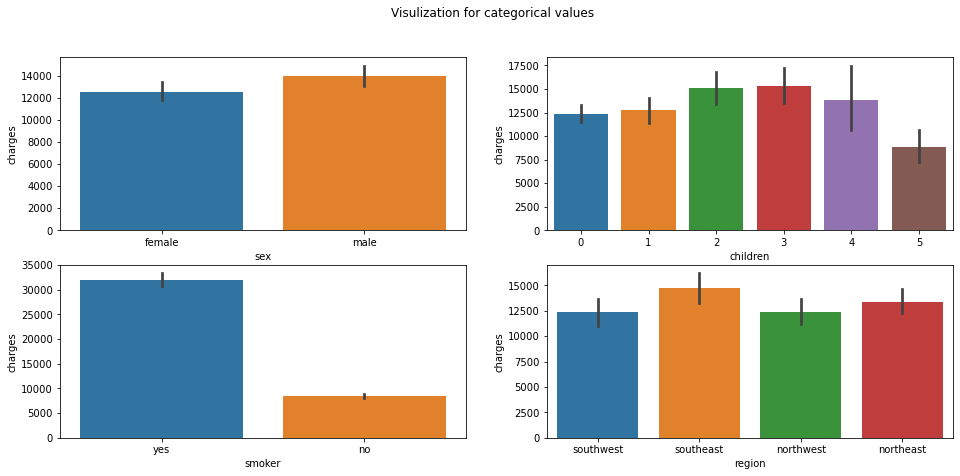

In [10]:
fig, axes = plt.subplots(2, 2, figsize = (16 ,7))
fig.suptitle("Visulization for categorical values")

sns.barplot(x = "sex", y = "charges", data = data, ax = axes[0,0])
sns.barplot(x = "children", y = "charges", data = data, ax = axes[0,1])
sns.barplot(x = "smoker", y = "charges", data = data, ax = axes[1,0])
sns.barplot(x = "region", y = "charges", data = data, ax = axes[1,1])

###### Analysis :
    1. One thing we can clearly understand from the smoker graph, is that there is high correlation between the smoker and charges
    2. For Children the charges are increasing till 3 kids and from there we can see some drop 
    3. Coming to region, we can see that the southeast region is having little more charges compared to south and north

#### Lets also check the pairplot, where we can put all the info at one place

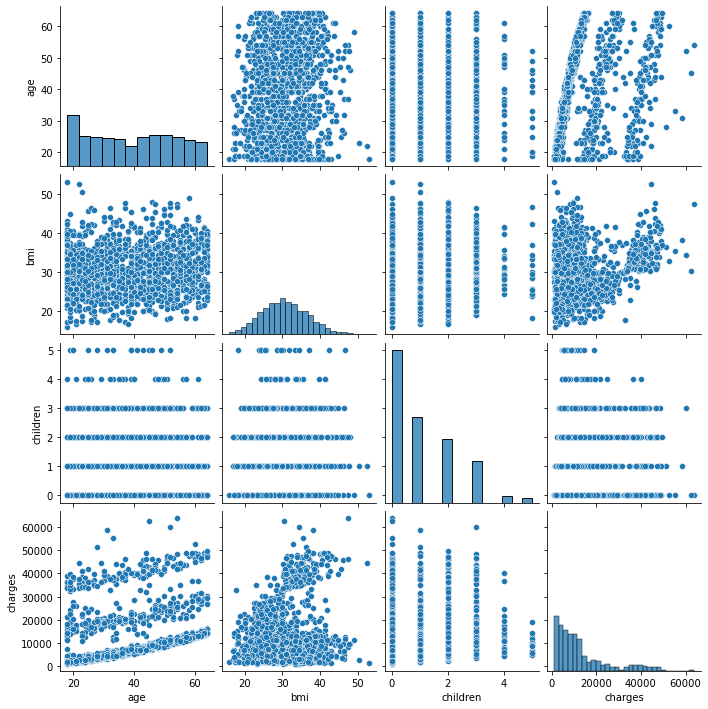

In [11]:
sns.pairplot(data = data)


##### Lets check if there are any outliers 

<AxesSubplot:xlabel='charges'>

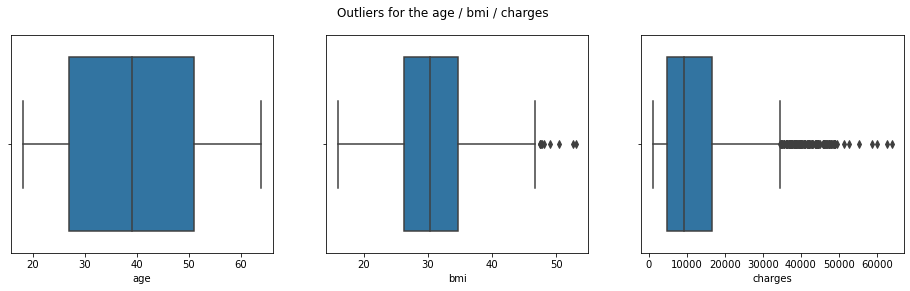

In [12]:
fig, axes = plt.subplots(1, 3, figsize = (16,4))
fig.suptitle("Outliers for the age / bmi / charges")

sns.boxplot(x = "age", data = data, ax = axes[0])
sns.boxplot(x = "bmi", data = data, ax = axes[1])
sns.boxplot(x = "charges", data = data, ax = axes[2])

###### Analysis :
    1. We can observe there are lot of outliers in the charges and few in bmi

#### Lets see the hashmap and see the correlation between all the values

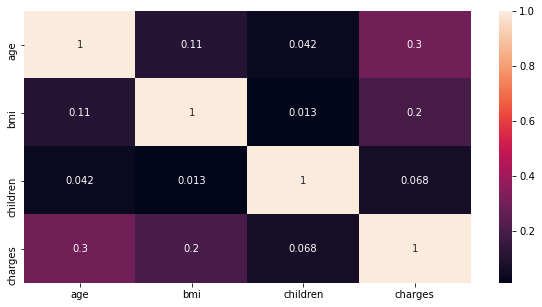

In [13]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [14]:
formula = "charges ~ age + sex + bmi + smoker + region"
model = ols.ols(formula = formula,data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     566.0
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:47:01   Log-Likelihood:                -13554.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1330   BIC:                         2.717e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.156e+04    

In [15]:
data = pd.get_dummies(data, columns = ["sex","smoker","region"], drop_first = True)

In [16]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [17]:
train_data , test_data = train_test_split(data, test_size = 0.3, random_state = 42)

In [18]:
print(train_data.shape)
print(test_data.shape)

(936, 9)
(402, 9)


In [19]:
X_train = train_data.drop("charges", axis = 1)
X_test = train_data["charges"]
Y_train = test_data.drop("charges", axis = 1)
Y_test = test_data["charges"]

In [20]:
LR = LinearRegression()
LR.fit(X_train,X_test)
pred = LR.predict(Y_train)

In [21]:
print("==========Linear Regression ==============")
print("Mean absolute error : "+str(metrics.mean_absolute_error(pred , Y_test)))
print("Mean sqaure error : "+str(metrics.mean_squared_error(pred , Y_test)))
print("Root Mean absolute error : "+str(np.sqrt(metrics.mean_squared_error(pred , Y_test))))
print("score : %.4f"% (LR.score(Y_train,Y_test)))
print("R2 Score : "+str(metrics.r2_score(pred , Y_test)))
print("==========Linear Regression ==============")

==========Linear Regression ==============
Mean absolute error : 4145.450555627587
Mean sqaure error : 33780509.57479164
Root Mean absolute error : 5812.100272258871
score : 0.7696
R2 Score : 0.6942952806198872
==========Linear Regression ==============


In [25]:
clf = RandomForestRegressor()
clf.fit(X_train,X_test)
clf_pred = clf.predict(Y_train)

In [26]:
print("==========Random Forst Regressor ==============")
print("Mean absolute error : "+str(metrics.mean_absolute_error(clf_pred , Y_test)))
print("Mean sqaure error : "+str(metrics.mean_squared_error(clf_pred , Y_test)))
print("Root Mean absolute error : "+str(np.sqrt(metrics.mean_squared_error(clf_pred , Y_test))))
print("score : %.4f"% (clf.score(Y_train,Y_test)))
print("R2 Score : "+str(metrics.r2_score(clf_pred , Y_test)))
print("==========Random Forst Regressor ==============")

==========Random Forst Regressor ==============
Mean absolute error : 2635.0187448201495
Mean sqaure error : 21665551.948693205
Root Mean absolute error : 4654.62693979799
score : 0.8522
R2 Score : 0.843590657713923
==========Random Forst Regressor ==============


###### Analysis:
    1. Compared to Linear Regression, Random forest Regressor given better results
    2. Now we can fit the model on the entire data set instead of train data
    3. We will convert the model into pickle file and use it in our front end

In [29]:
X = data.drop("charges", axis = 1)
Y = data["charges"]
final_clf = RandomForestRegressor()
final_clf.fit(X,Y)

RandomForestRegressor()

In [34]:
print("====== Prediction on some sample data ============")
print(final_clf.predict([[50,45,2,1,1,0,0,1]]))
print(clf.predict([[50,45,2,1,1,0,0,1]]))
print(LR.predict([[50,45,2,1,1,0,0,1]]))

====== Prediction on some sample data ============
[46275.518975]
[45956.0148935]
[40046.78788029]


##### Uploading the model into the pickle fiel

In [27]:
file = open("insurance.pkl","wb")
pickle.dump(final_clf,file)